In [530]:
import pandas as pd
from matplotlib import pyplot as plt

### Variablen

In [531]:
today = date.today()
ts = pd.to_datetime('2020-09-01', utc=True)

### Daten einlesen

In [532]:
pfad = "D:\\Github\\Auswertung_Covid_19\\input\\data-ovyiI.csv"

In [533]:
df_divi = pd.read_csv(pfad)
df_divi["date"] = pd.to_datetime(df_divi["date"], utc=True)
df_divi['date'] = pd.to_datetime(df_divi['date']).dt.date

# Datum Filter
df_divi = df_divi.loc[df_divi.date >= ts, :]

df_divi.head(3)

,date,COVID-19-Fälle
165,2020-09-01,233
166,2020-09-02,226
167,2020-09-03,221


In [534]:
df_who = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

In [535]:
# data cleaning
df_who = df_who.drop(columns=['Country_code', 'WHO_region', 'Cumulative_deaths', 'Cumulative_cases'])
df_who = df_who[df_who.New_cases != 0]

In [536]:
# Datentyp
df_who['Date_reported'] = pd.to_datetime(df_who['Date_reported'], utc=True)
df_who['Date_reported'] = pd.to_datetime(df_who['Date_reported']).dt.date
# Filter Datum
df_who = df_who.loc[df_who.Date_reported >= ts, :]
# Filter Land
df_who = df_who.loc[df_who.Country == "Germany"]
df_who.head(3)

,Date_reported,Country,New_cases,New_deaths
54920,2020-09-01,Germany,1218,4
54921,2020-09-02,Germany,1256,11
54922,2020-09-03,Germany,1311,8


In [537]:
df_who = df_who.rename(columns={'Date_reported':'date'})
df_who.head(3)

,date,Country,New_cases,New_deaths
54920,2020-09-01,Germany,1218,4
54921,2020-09-02,Germany,1256,11
54922,2020-09-03,Germany,1311,8


In [538]:
df_merge = df_who.merge(df_divi, on="date", how="left")
df_merge.head(3)

,date,Country,New_cases,New_deaths,COVID-19-Fälle
0,2020-09-01,Germany,1218,4,233
1,2020-09-02,Germany,1256,11,226
2,2020-09-03,Germany,1311,8,221


In [539]:
df_merge['MA'] = df_merge['New_cases'].rolling(window=7, min_periods=1).mean()
df_merge['MA_d'] = df_merge['New_deaths'].rolling(window=7, min_periods=1).mean()
case_fatality = str(round( 100 * (df_merge["MA_d"].iloc[-1] / df_merge["MA"].iloc[-20]),1 ))
df_merge.head(3)

,date,Country,New_cases,New_deaths,COVID-19-Fälle,MA,MA_d
0,2020-09-01,Germany,1218,4,233,1218.000000,4.000000
1,2020-09-02,Germany,1256,11,226,1237.000000,7.500000
2,2020-09-03,Germany,1311,8,221,1261.666667,7.666667


### Rechnen

In [540]:
MA_max = df_merge['MA'].max()
MA_d_max = df_merge['MA_d'].max()
divi_max = df_merge['COVID-19-Fälle'].max()
print(MA_max)
print(MA_d_max)
print(divi_max)

58107.71428571428
896.2857142857143
5745


In [541]:
df_merge['cases'] = 100 * (df_merge['MA'] / MA_max)
df_merge['deaths'] = 100 * (df_merge['MA_d'] / MA_d_max)
df_merge['divi'] = 100 * (df_merge['COVID-19-Fälle'] / divi_max)

df_merge = df_merge.drop(columns=['New_cases', 'New_deaths', 'COVID-19-Fälle', 'MA', 'MA_d'])
df = df_merge
df.head(3)

,date,Country,cases,deaths,divi
0,2020-09-01,Germany,2.096107,0.446286,4.055701
1,2020-09-02,Germany,2.128805,0.836787,3.933856
2,2020-09-03,Germany,2.171255,0.855382,3.846823


### Visualisierung

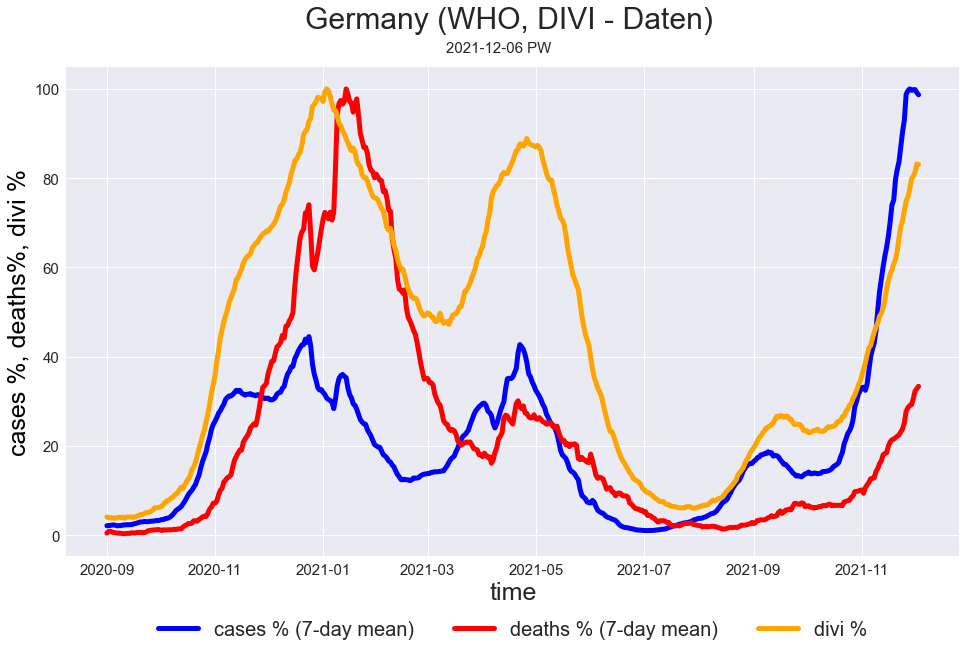

In [545]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16, 9))
# formatter = FuncFormatter(y_axis_thousands)
# ax.yaxis.set_major_formatter(formatter)

plt.plot(df.date, df['cases'], color="blue", marker="", linestyle="solid", label="cases % (7-day mean)",
         linewidth=5)
plt.plot(df.date, df['deaths'], color="red", marker="", linestyle="solid", label="deaths % (7-day mean)",
         linewidth=5)
plt.plot(df.date, df['divi'], color="orange", marker="", linestyle="solid", label="divi %",
         linewidth=5)
ax.set_xlabel("time", fontsize=25)
ax.set_ylabel("cases %, deaths%, divi %", color="black", fontsize=25)

ax.tick_params(labelsize=15)

plt.legend(loc='center',
           bbox_to_anchor=(0.5, -0.15),
           fancybox=True,
           shadow=True,
           ncol=3,
           fontsize=20)

plt.title(f'Germany (WHO, DIVI - Daten) \n', fontsize=30)

plt.suptitle(f'{today} PW',
             fontsize=15, y=0.92)
plt.savefig("D:\\Github\\Auswertung_Covid_19\\Output\\who_divi.png", dpi=200, bbox_inches='tight')